Sherry Zhang
4/20/22

McDonald's Death Prediction/Analysis

Question:
When is McDonalds going to die/fail?

I originally planned to do a study based upon when an individual restaurant was going to close or the rate of success they might have. Unfortunately, I couldn’t find any data released by the McDonald’s corporation on individual stores like when they opened, closed, and their profit. So instead I pivoted to see how long McDonald’s as a corporation would last overall. From McDonald's annual reports, I was able to get data such as the amount of stores opened, closed, corporate, franchised, etc.

Datasets:
MCD stock data - taken from yahoo finance
Locations - for 2022
Open Close each year - created by myself from McDonald's annual reports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import stats
from scipy.optimize import curve_fit

pd.set_option('display.max_rows', None)

In [ ]:
stock_data = pd.read_csv('Data/stocks.csv')

#Reformat dates
year = []
month = []
for ind in stock_data.index:
    year.append(int(stock_data['Date'][ind][0:4]))
    month.append(stock_data['Date'][ind][0:7])

stock_data.insert(1, 'Year', year)
stock_data.insert(0, 'Month', month)

stock_data = stock_data.drop(stock_data[stock_data.Year < 2000].index)
stock_data = stock_data.drop(stock_data[stock_data.Year > 2020].index)
stock_data = stock_data[['Date', 'Year', 'Month', 'High']]


#Find Mcd average stock value per year
year_avg_stocks = pd.DataFrame(stock_data.groupby(by='Year')['High'].mean(), columns=['High'])

years = year_avg_stocks.index.values
year_avg_stocks.reset_index(inplace=True, drop = True)
year_avg_stocks.insert(0, 'Year', years)

year_avg_stocks = year_avg_stocks.rename(columns={'High':'High MCD'})
# print(year_avg_stocks)


#find month average stocks to graph
month_avg_stocks = pd.DataFrame(stock_data.groupby(by='Month')['High'].mean(), columns=['High'])

months = list(month_avg_stocks.index.values)
month_avg_stocks.reset_index(inplace=True, drop = True)
month_avg_stocks.insert(0, 'Month', months)
print(month_avg_stocks)

In [ ]:
#load number of stores closed/opened
store_num_data = pd.read_csv('Data/open close data.csv')

In [ ]:
dow_jones = pd.read_csv('Data/dowjones.csv')

#calculate overall economy value per year
dow_jones_2000 = []
for ind in dow_jones.index:
    date = dow_jones["Date"][ind].split('-')

    if 20 >= int(date[2]) >= 0:
        data = [f'20{date[2]}', float(dow_jones['High'][ind].replace(',', ''))]
        dow_jones_2000.append(data)

dow_jones_2000 = pd.DataFrame(dow_jones_2000, columns=['Year', 'High'])

#groupby year and get mean
yearly_dow = pd.DataFrame(dow_jones_2000.groupby(by='Year')['High'].mean(), columns=['High'])
years = yearly_dow.index.values.astype(int)
yearly_dow.reset_index(inplace = True, drop = True)
yearly_dow.insert(0, 'Year', years)

yearly_dow = yearly_dow.rename(columns={'High': 'Dow High'})

print(yearly_dow)


In [ ]:
ads_profits = pd.read_csv('Data/budget and profits.csv')

avg_profits = []

#find average profit per franchise
for ind in ads_profits.index:
    franchise_profit = ads_profits['Franchise Profits'][ind]/ads_profits['Franchises'][ind] * 10000000
    avg_profits.append(round(franchise_profit,0))

ads_profits['average profit per franchise'] = avg_profits
print(ads_profits)
print(round(ads_profits['average profit per franchise'].mean(),0))

In [ ]:
#create master dataset

final_data = year_avg_stocks

final_data = pd.merge(final_data, yearly_dow, how='left', on='Year')

final_data = pd.merge(final_data, ads_profits, how='left', on='Year')
final_data = pd.merge(final_data, store_num_data, how='left', on='Year')

final_data = final_data.dropna()

print(final_data)


In [ ]:
# #Get average distance between the two closests McDonald's

# locations = pd.read_csv('Data/locations.csv')
# # print(locations)

# #shuffle and take first 50 as a sample
# locations_shuffle = locations.sample(frac=1)

# locations_sample = locations_shuffle.head(50)

# #calculate average distance between 2 mcdonalds that are the closest to eachother
# final_distances = np.array([])
# for i, ind1 in enumerate(locations_sample.index):
#     distances = np.array([])
    
#     for ind2 in locations.index:
#         #use haversine's formula to calculate distance between 2 points
#         if locations_sample['log'][ind1] != locations['log'][ind2] and locations_sample['lat'][ind1] != locations['lat'][ind2]:
#             log1 = radians(locations_sample['log'][ind1])
#             log2 = radians(locations['log'][ind2])
#             lat1 = radians(locations_sample['lat'][ind1])
#             lat2 = radians(locations['lat'][ind2])

#             r = 3956

#             final_distance = 2 * r * np.arcsin(sqrt( (sin(lat2-lat1)/2) **2 + cos(lat1) * cos(lat2) * (sin(log2-log1)/2) **2 ))

#             final_distance = round(final_distance, 1)

#             distances = np.append(distances, final_distance)

#     #get minimum distance
#     min_distance = np.amin(distances)
    
#     #add to numpy array
#     final_distances = np.append(final_distances, min_distance)

# # final_distances = list(final_distances)
# locations_sample['distance to closest McDonalds'] = final_distances

# # print(final_distances)
# print(np.average(final_distances))
# print(np.median(final_distances))
# print(stats.mode(final_distances))

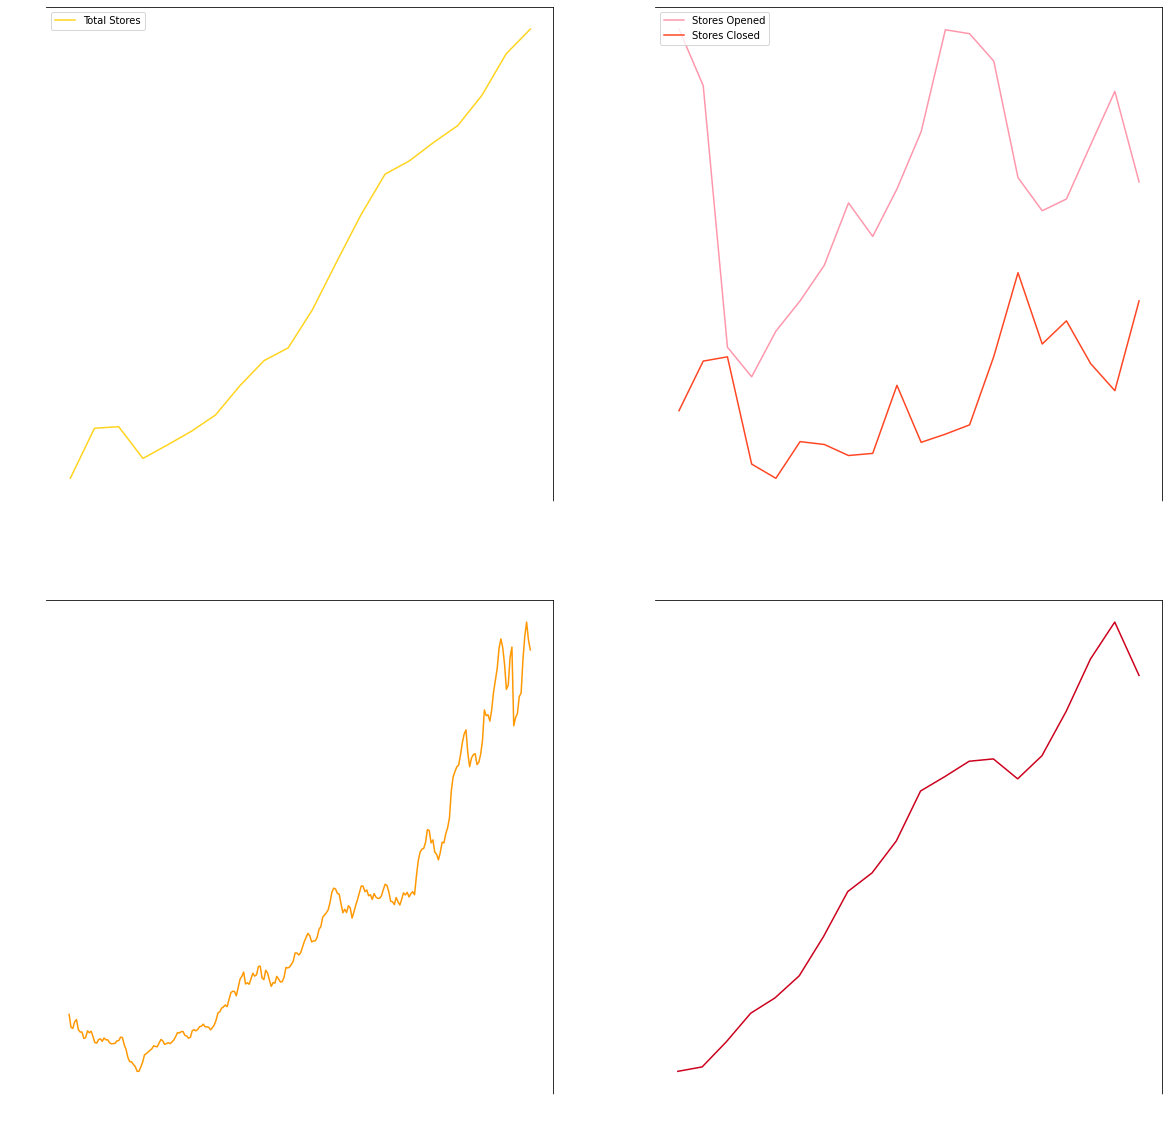

In [108]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(20, 20)

#graph total stores over time
ax[0][0].plot(final_data['Year'], final_data['Total Stores'], '#ffd41f', label='Total Stores')
ax[0][0].legend(loc="upper left")

ax[0][0].set_xticks(list(store_num_data['Year'])[::-2])

#graph number of stores opened/closed overtime
ax[0][1].plot(final_data['Year'], final_data['Stores Opened'], '#ff97ac', label='Stores Opened')
ax[0][1].plot(final_data['Year'], final_data['Stores Closed'], '#ff4623', label='Stores Closed')
ax[0][1].legend(loc="upper left")

ax[0][1].set_xticks(list(store_num_data['Year'])[::-2])

#graph average stocks per month
ax[1][0].plot(month_avg_stocks['Month'], month_avg_stocks['High'], '#ff9801')
ax[1][0].set_xticks(list(month_avg_stocks['Month'])[::36])
ax[1][0].set_xlabel('Stock Avg Each Month', color='white')

#graph Franchise Profits per year
ax[1][1].plot(final_data['Year'], final_data['Franchise Profits'], '#cc001d')
ax[1][1].set_xlabel('Franchise Profits Per Year', color='white')

# Make axis/labels white
for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')

In [107]:
#predict stock price exponentially
month_avg_stock = month_avg_stocks.iloc[72:251]

# print(month_avg_stock)
month_avg_stock.reset_index(inplace=True, drop = True)


def ex(month, k2, k1):
    return k1 * np.exp(month*k2)

k = curve_fit(ex, month_avg_stock.index.values, month_avg_stock['High'])

# test = ex(month_avg_stock.index.values, 9.99999995e-01, -558104011e-13)

print(k)

(array([ 1.00000000e+00, -3.26451021e-13]), array([[ 2.39471623e-14, -1.58722605e-18],
       [-1.58722605e-18,  1.05202484e-22]]))


In [ ]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(20, 20)

#graph total stores over time
ax[0][0].plot(month_avg_stocks.index.values, test)

# Make axis/labels white
for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')

In [ ]:
#linear regression model

def lin_reg(X, k1, k2, k3, k4):
    ad_bud = X['Ad Budget']
    dow = X['Dow High']
    stocks = X['High MCD']
    total_stores = X['Total Stores']

    return ad_bud * k1 + dow * k2 + stocks * k3 + total_stores * k4
    
k = curve_fit(lin_reg, final_data, final_data['Franchise Profits'])

k1 = k[0][0]
k2 = k[0][1]
k3 = k[0][2]
k4 = k[0][3]

print(k1, k2, k3, k4)
print(lin_reg(final_data.iloc[3], 5.595187755171539, -0.13128815663076795, 61.022862765451386, 0.025862224611516785))